欠損させた場合の可視化

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cbook as cbook

In [38]:
def plot_both(ax,data_name,plot_type,colors,t,skiptime,persona):
    #both
    attr_auc = []
    attr_nll = []
    edge_auc = []
    edge_nll = []

    attempt = 0

    path = "../experiment_data/imcomplete/{}/t={}/both/attempt={}/persona={}".format(data_name,skiptime,attempt,persona)

    attr_auc_path = path + "/proposed_attr_auc.npy"
    attr_nll_path = path + "/proposed_attr_nll.npy"
    edge_auc_path = path + "/proposed_edge_auc.npy"
    edge_nll_path = path + "/proposed_edge_nll.npy"



            

    attr_auc.append(np.load(attr_auc_path))
    attr_nll.append(np.load(attr_nll_path))
    edge_auc.append( np.load(edge_auc_path))
    edge_nll.append(np.load(edge_nll_path))

    attr_mean = np.mean(attr_auc,axis=1)
    attr_max = np.max(attr_auc,axis=1)
    attr_min = np.min(attr_auc,axis=1)
    edge_mean = np.mean(edge_auc,axis=1)
    edge_max = np.max(edge_auc,axis=1)
    edge_min = np.min(edge_auc,axis=1)

    time = [1,2,3,4,5]

    if plot_type == "edge":
        ax.plot(time, edge_mean[0], lw=2, label="both{}".format(skiptime), color=colors[t])
        ax.fill_between(time, edge_min[0], edge_max[0], facecolor=colors[t], alpha=0.1)

    else:
        ax.plot(time, attr_mean[0], lw=2, label="both{}".format(skiptime), color=colors[t])
        ax.fill_between(time, attr_min[0], attr_max[0], facecolor=colors[t], alpha=0.1)




In [39]:
def plot_comlete(ax,data_name,plot_type,persona):
    #both

    attr_auc = []
    attr_nll = []
    edge_auc = []
    edge_nll = []

    

    path = "../experiment_data/complete/{}/persona={}".format(data_name,persona)

    attr_auc_path = path + "/proposed_attr_auc.npy"
    attr_nll_path = path + "/proposed_attr_nll.npy"
    edge_auc_path = path + "/proposed_edge_auc.npy"
    edge_nll_path = path + "/proposed_edge_nll.npy"

    attr_auc_path = path + "/proposed_attr_auc.npy"
    attr_nll_path = path + "/proposed_attr_nll.npy"
    edge_auc_path = path + "/proposed_edge_auc.npy"
    edge_nll_path = path + "/proposed_edge_nll.npy"

    attr_auc.append(np.load(attr_auc_path))
    attr_nll.append(np.load(attr_nll_path))
    edge_auc.append(np.load(edge_auc_path))
    edge_nll.append(np.load(edge_nll_path))

    attr_mean = np.mean(attr_auc,axis=1)
    attr_max = np.max(attr_auc,axis=1)
    attr_min = np.min(attr_auc,axis=1)
    edge_mean = np.mean(edge_auc,axis=1)
    edge_max = np.max(edge_auc,axis=1)
    edge_min = np.min(edge_auc,axis=1)



    time = [1,2,3,4,5]

    if plot_type == "edge":
        ax.plot(time, edge_mean[0], lw=2, label="Complete", color="#005AFF")
        ax.fill_between(time, edge_min[0], edge_max[0], facecolor="#005AFF", alpha=0.1)

    else:
        ax.plot(time, attr_mean[0], lw=2, label="Complete", color="#005AFF")
        ax.fill_between(time, attr_min[0], attr_max[0], facecolor="#005AFF", alpha=0.1)

In [40]:
def plot_allboth(data_name,plot_type):   
    
    colors = ["#FF4B00","#03AF7A","#4DC4FF","#F6AA00","#FFF100","#000000"]

    if data_name == "NIPS":
        persona_list = [3,5,8,12,16]
    else:
        persona_list = [5,25,50]

    for persona in persona_list:
        t=0
        fig, ax = plt.subplots(1) 
        for skiptime in [2,3,4]:
        
            plot_both(ax,data_name,plot_type,colors,t,skiptime,persona)
            t += 1

    
            
        t += 1

        plot_comlete(ax,data_name,plot_type,persona)




        ax.set_xticks([1,2,3,4,5])
        ax.set_title(r'{} auc del {}[{} persona:{}]'.format(plot_type,"both",data_name,persona))
        ax.legend(loc='upper left',bbox_to_anchor=(1, 1))
        ax.set_xlabel('time')
        ax.set_ylabel('accuracy')

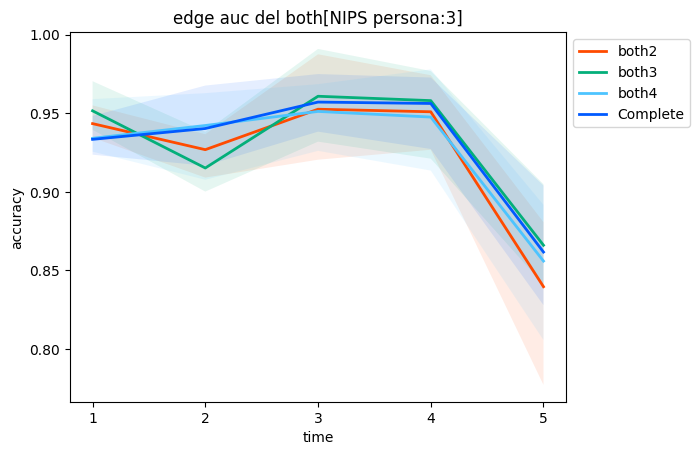

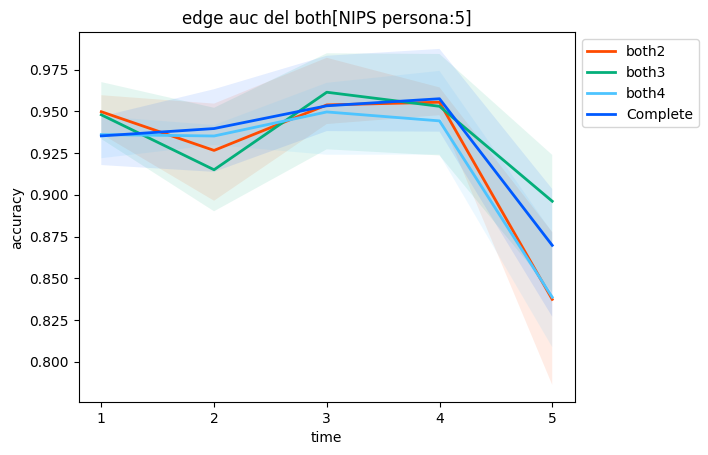

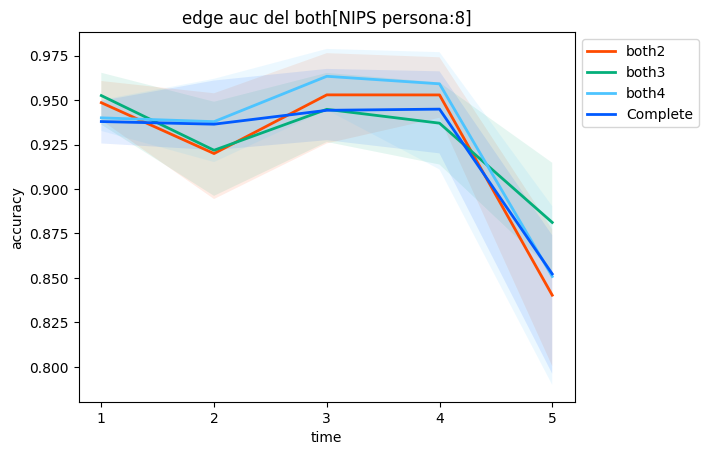

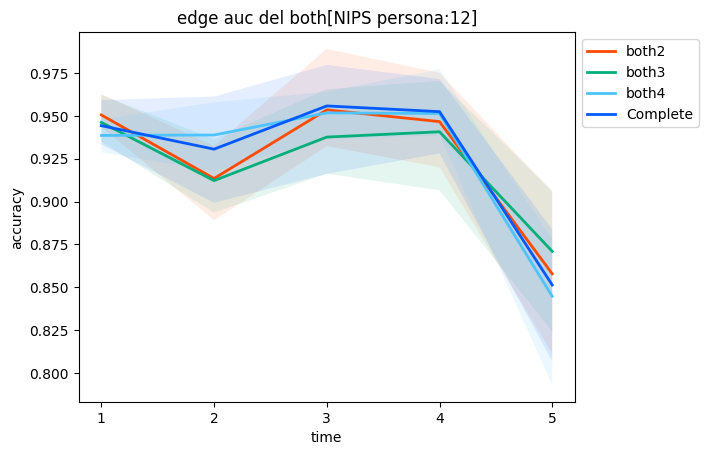

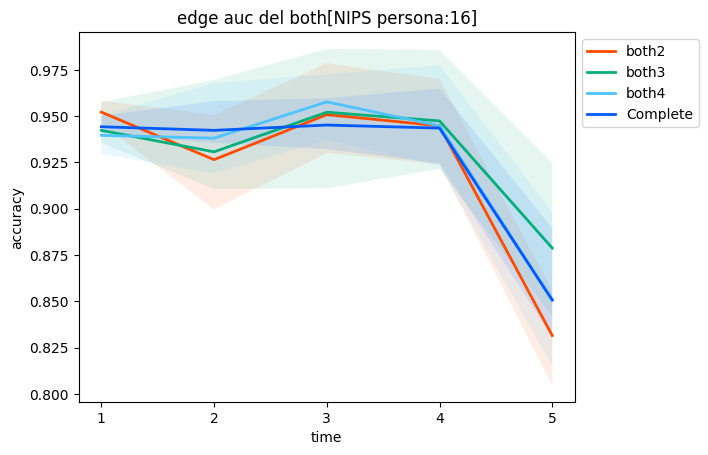

In [45]:
plot_allboth("NIPS","edge")

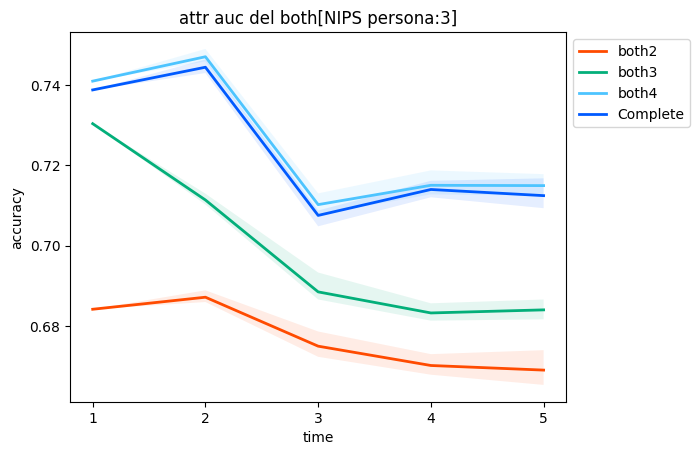

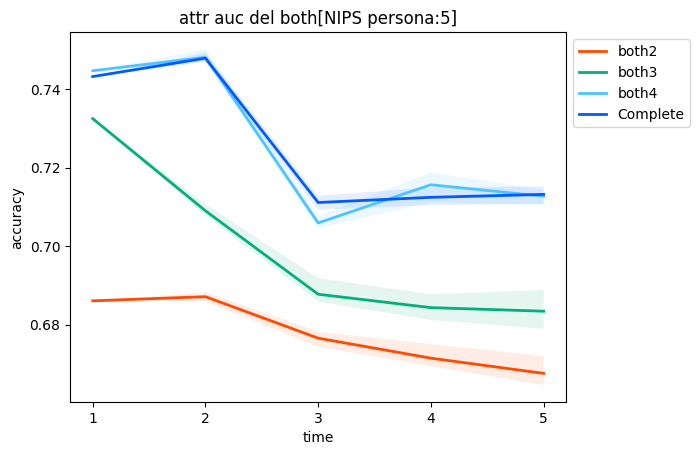

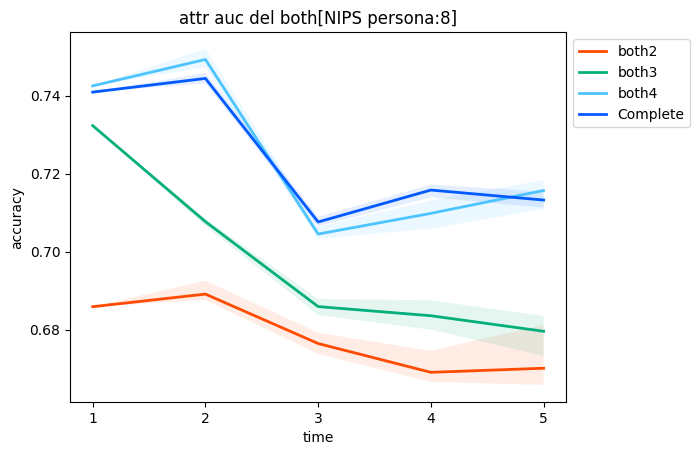

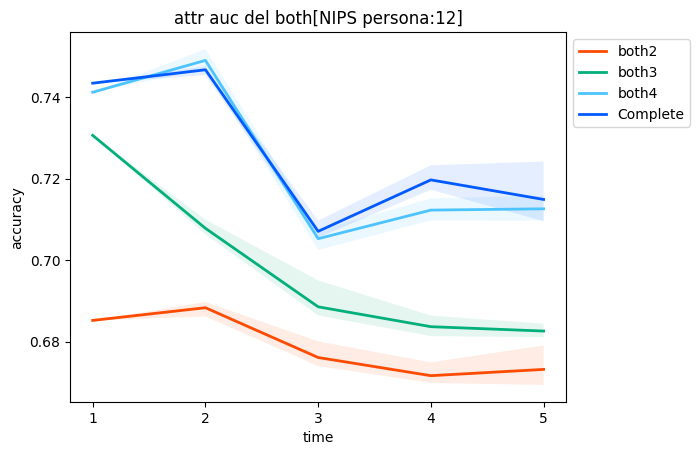

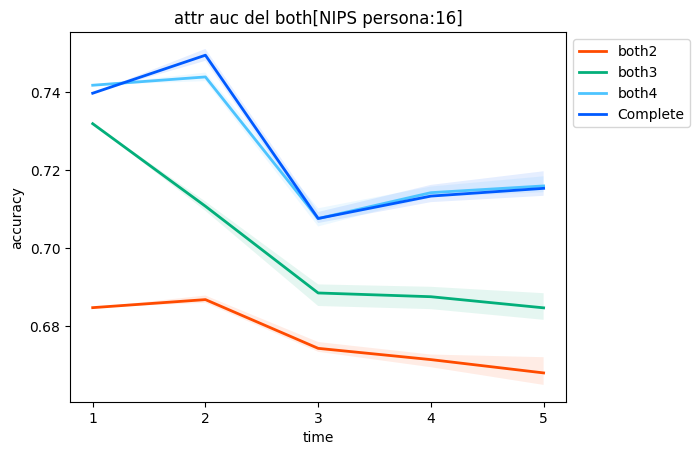

In [46]:
plot_allboth("NIPS","attr")

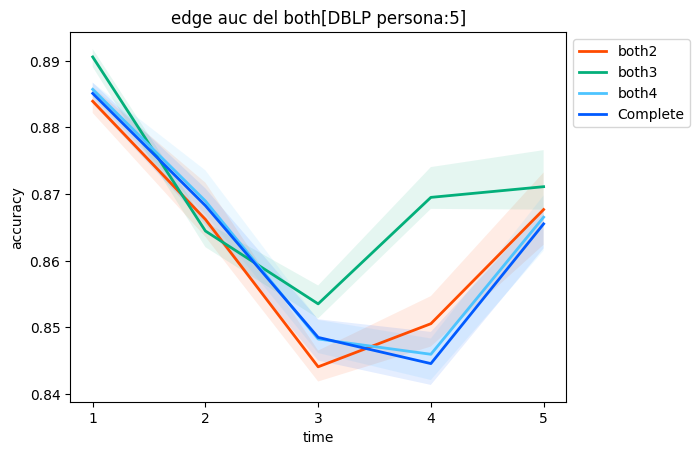

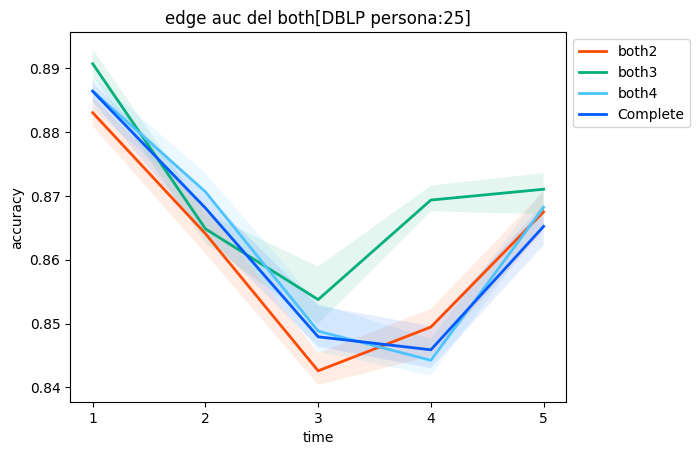

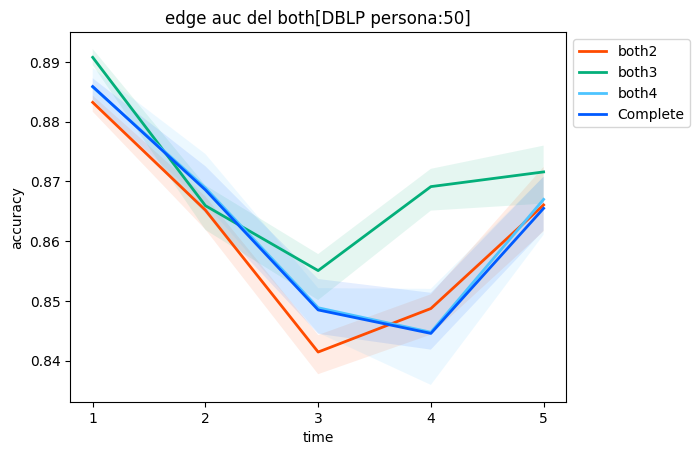

In [47]:
plot_allboth("DBLP","edge")

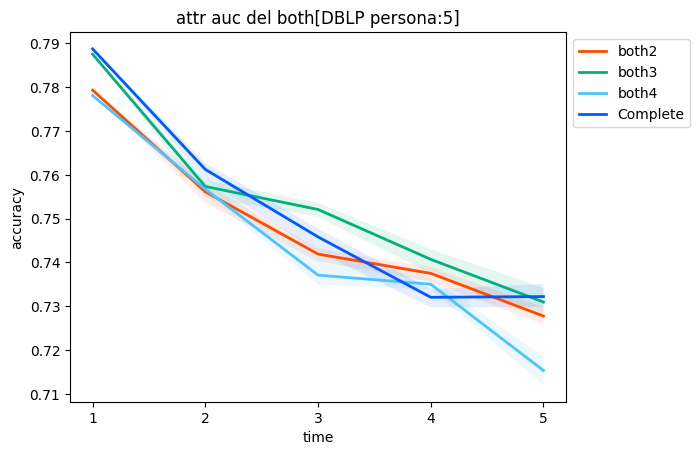

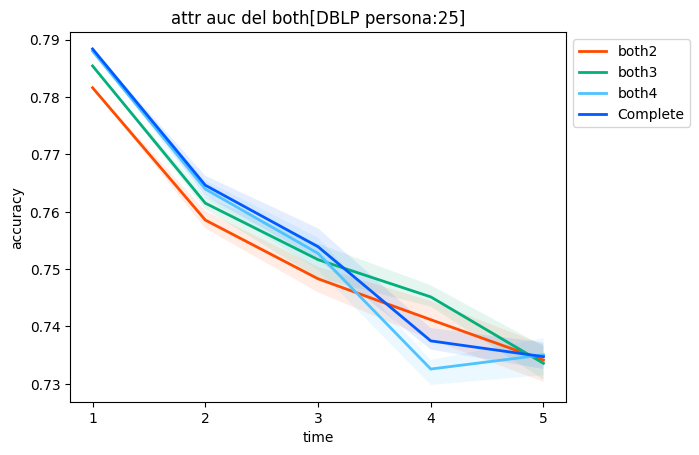

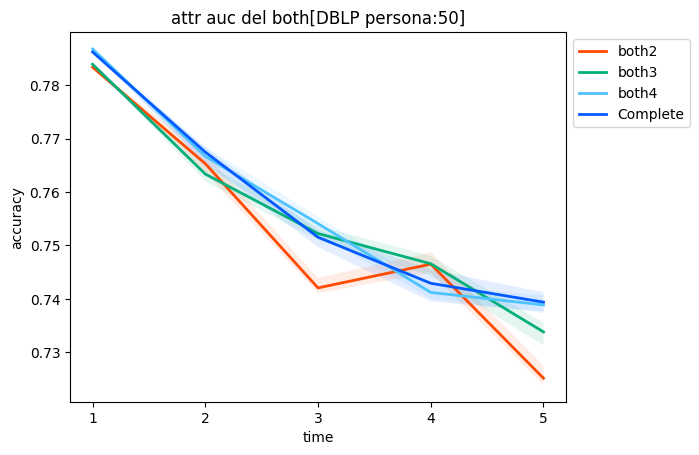

In [44]:
plot_allboth("DBLP","attr")

In [ ]:
def plot_data(data_name,del_type):   


    
    colors = ["red","blue"]


    fig, ax = plt.subplots(1)
    
        
    attr_auc = []
    attr_nll = []
    edge_auc = []
    edge_nll = []
    attr = 0
    edge = 0
    for attempt in range(10):

        path = "../experiment_data/imcomplete/{}/t=4/{}/percent={}/attempt={}/persona={}".format(data_name,del_type,attempt)

        attr_auc_path = path + "/proposed_attr_auc.npy"
        attr_nll_path = path + "/proposed_attr_nll.npy"
        edge_auc_path = path + "/proposed_edge_auc.npy"
        edge_nll_path = path + "/proposed_edge_nll.npy"

        attr += np.load(attr_auc_path)
        edge += np.load(edge_auc_path)

    attr_auc.append(attr/10)
    attr_nll.append(np.load(attr_nll_path))
    edge_auc.append(edge/10)
    edge_nll.append(np.load(edge_nll_path))

    attr_mean = np.mean(attr_auc,axis=1)
    attr_max = np.max(attr_auc,axis=1)
    attr_min = np.min(attr_auc,axis=1)
    edge_mean = np.mean(edge_auc,axis=1)
    edge_max = np.max(edge_auc,axis=1)
    edge_min = np.min(edge_auc,axis=1)

    time = [1,2,3,4,5]

    if del_type == "edge":
        ax.plot(time, edge_max[0], lw=2, label=str(p), color=colors[t])
        ax.fill_between(time, edge_min[0], edge_max[0], facecolor=colors[t], alpha=0.1)

    else:
        ax.plot(time, attr_max[0], lw=2, label=str(p), color=colors[t])
        ax.fill_between(time, attr_min[0], attr_max[0], facecolor=colors[t], alpha=0.1)


    t += 1

    time = [1,2,3,4,5]

    #ax.fill_between(time, edge_min[0], edge_max[0], facecolor="blue", alpha=0.1)

    ax.set_xticks([1,2,3,4,5])
    ax.set_title(r'{} auc percent={}'.format(del_type,percent))
    ax.legend(loc='upper left')
    ax.set_xlabel('time')
    ax.set_ylabel('accuracy')